# Gradient Descent Step-by-Step

## Block 1: Import Libraries and Load Data
1. **Libraries Used**:
    - `pandas`: For handling tabular data.
    - `numpy`: For numerical computations.
    - `matplotlib.pyplot`: For data visualization.
    - `LinearRegression` from `sklearn.linear_model`: To create a baseline regression model.

2. **Dataset**:
    - The dataset used contains two columns: `YearsExperience` (independent variable) and `Salary` (dependent variable).
    - This block loads the dataset into a DataFrame and prints the first few rows to understand the structure.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
dataset = pd.read_csv(r"../Supervised Learning/Algorithms in Supervised Learning/Regression Algorithms/Simple Linear Regression/Data/Salary_dataset.csv")

# Display the first few rows of the dataset
print(dataset.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


## Block 2: Visualize Data
1. A scatter plot is used to visualize the relationship between:
    - `Years of Experience` (X-axis)
    - `Salary` (Y-axis)
2. Purpose:
    - To check if a linear relationship exists between the two variables.
3. Observation:
    - Points should ideally follow a trend that can be fitted using a regression line.

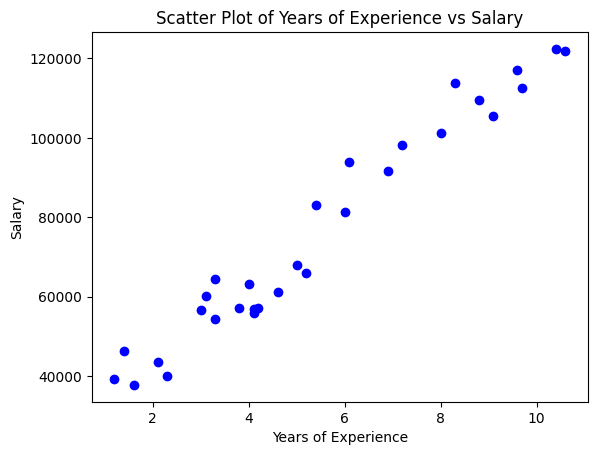

In [2]:
# Visualize the relationship between Years of Experience and Salary
plt.scatter(dataset["YearsExperience"], dataset["Salary"], color='blue')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Scatter Plot of Years of Experience vs Salary")
plt.show()

## Block 3: Create and Train Linear Regression Model
1. **Step 1**: Define X (independent variable) and y (dependent variable).
    - `X` contains `YearsExperience`.
    - `y` contains `Salary`.
2. **Step 2**: Train a Linear Regression model using `sklearn`.
    - `lr.coef_`: Slope of the fitted regression line.
    - `lr.intercept_`: Y-intercept of the regression line.
3. **Output**: The values of `m` and `b` represent the fitted line.

In [3]:
# Define feature (X) and target (y)
X = dataset[["YearsExperience"]]
y = dataset["Salary"]

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X, y)

# Retrieve the slope (m) and intercept (b)
m = lr.coef_[0]  # Slope
b = lr.intercept_  # Intercept

# Display slope and intercept
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")

Slope (m): 9449.962321455077
Intercept (b): 24848.203966523193


## Block 4: Visualize Fitted Regression Line
1. **Purpose**: Overlay the regression line on the scatter plot to compare predictions with actual data.
2. **Steps**:
    - Scatter plot for `YearsExperience` vs `Salary`.
    - Line plot for predictions using the fitted model.
3. **Observation**: The red line shows the fitted regression model.

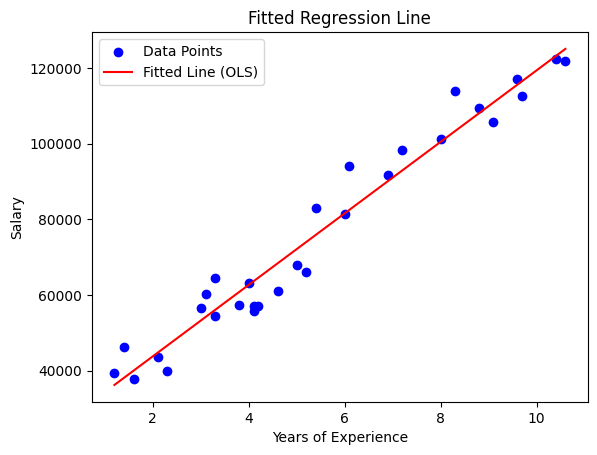

In [4]:
# Visualize the regression line along with data points
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, lr.predict(X), color='red', label='Fitted Line (OLS)')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Fitted Regression Line")
plt.show()

## Block 5: Gradient Descent (Manual Steps)
1. **Purpose**:
    - To demonstrate the step-by-step improvement of the regression line using gradient descent.
2. **Steps**:
    - Start with an initial `b = 0`.
    - Calculate the gradient (loss slope) using the formula: `-2 * sum(actual - predicted)`.
    - Update `b` using: `b = b - (learning rate * gradient)`.
    - Repeat for a few iterations to see the improvement.
3. **Visualization**: Each iteration updates the line and gets closer to the true regression line.

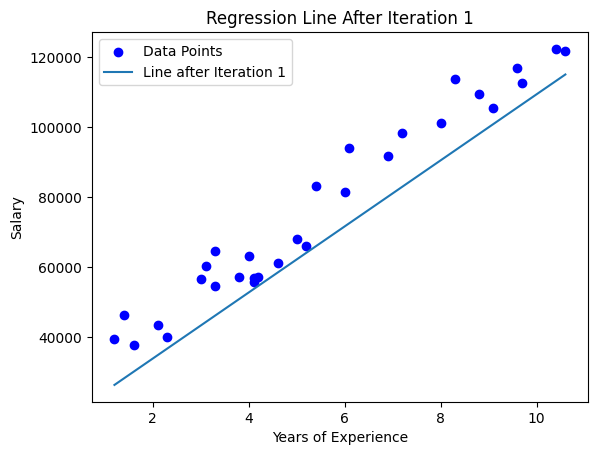

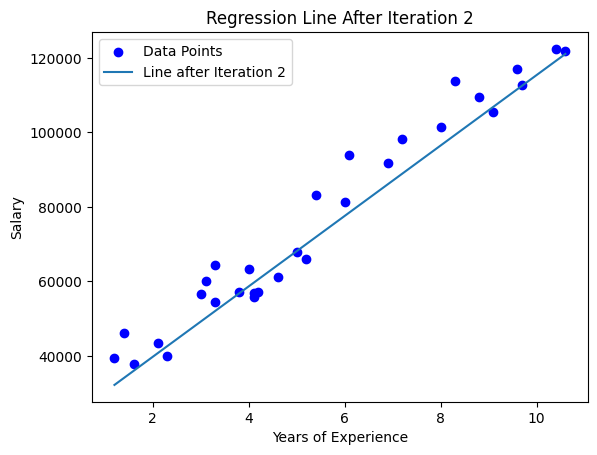

In [5]:
# Initialize parameters for gradient descent
b = 0  # Start with b = 0
learningRate = 0.01  # Learning rate

# Perform two iterations to demonstrate gradient descent
for i in range(2):
    loss_slope = -2 * np.sum(y - (m * X.squeeze() + b))  # Gradient calculation
    step_size = learningRate * loss_slope  # Step size
    b -= step_size  # Update intercept

    # Predict new line based on updated b
    y_pred = (m * X) + b

    # Plot updated line
    plt.scatter(X, y, color='blue', label='Data Points')
    plt.plot(X, y_pred, label=f'Line after Iteration {i + 1}')
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.title(f"Regression Line After Iteration {i + 1}")
    plt.show()

## Block 6: Full Gradient Descent Loop
1. **Purpose**:
    - To run multiple iterations of gradient descent until convergence.
2. **Parameters**:
    - `learningRate`: Controls the step size for updates.
    - `epochs`: Number of iterations to perform.
3. **Observation**:
    - The final value of `b` (intercept) aligns closely with the OLS model's intercept.
    - The green line represents the result of gradient descent.

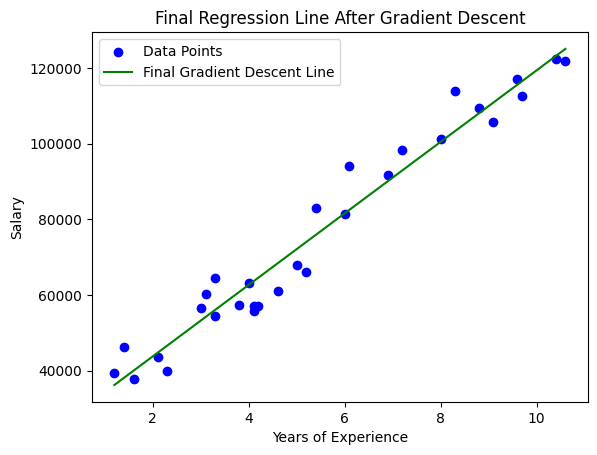

Final b: 24848.203966523153


In [6]:
# Gradient descent with multiple iterations
b = 0  # Reset b
learningRate = 0.001  # Smaller learning rate
epochs = 1000  # Number of iterations

# Perform gradient descent
for i in range(epochs):
    loss_slope = -2 * np.sum(y - (m * X.squeeze() + b))
    b -= (learningRate * loss_slope)

# Final regression line
y_pred = m * X + b

# Plot the final regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='green', label='Final Gradient Descent Line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Final Regression Line After Gradient Descent")
plt.show()

# Print the final value of b
print(f"Final b: {b}")